# Least squares fit example

Let's find the least squares fit for a toy dataset. 
First, create the data.

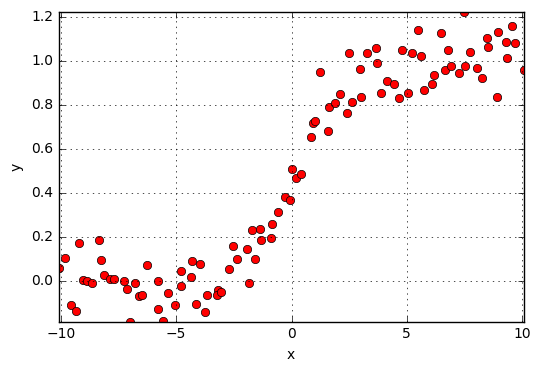

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2017)

x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

x = x + 0.1 * np.random.randn(x.size)
y = y + 0.1 * np.random.randn(y.size)

plt.plot(x, y, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.grid()
plt.show()

Now, let's assume linear model between x and y: 
$$y[n] = ax[n] + b + w[n],$$
and find the LS fit for $\boldsymbol{\theta} = [a,b]^T$. We need to represent the data in a matrix form: 
$$
\mathbf{y} = \mathbf{X}\boldsymbol{\theta} + \mathbf{w}.
$$
Next, we will minimize the residual error $J(\boldsymbol{\theta}) = \mathbf{w}^T\mathbf{w} = (\mathbf{y} - \mathbf{X}\boldsymbol{\theta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\theta})$. 

In [4]:
X = np.column_stack([x, np.ones_like(x)])
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

Plot the result:

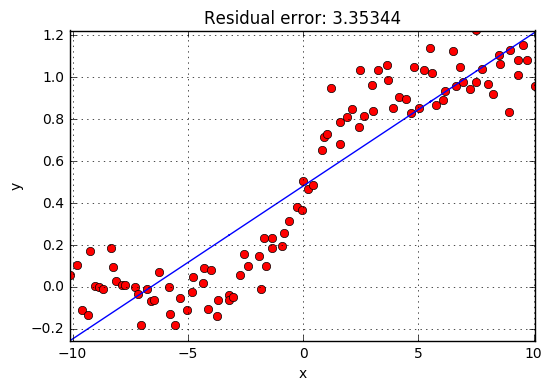

In [5]:
a, b = theta
plt.plot(x, y, 'ro')
plt.plot(x, a*x + b, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.grid()
plt.title('Residual error: %.5f' % (np.sum((y - (a*x + b))**2)))
plt.show()

The nice property of LS is that we can throw in whatever columns we wish. See what happens with the second order polynomial:
$$
y[n] = ax^2[n] + bx[n] + c + w[n].
$$
Also: we use the ready-made function `np.linalg.lstsq`.

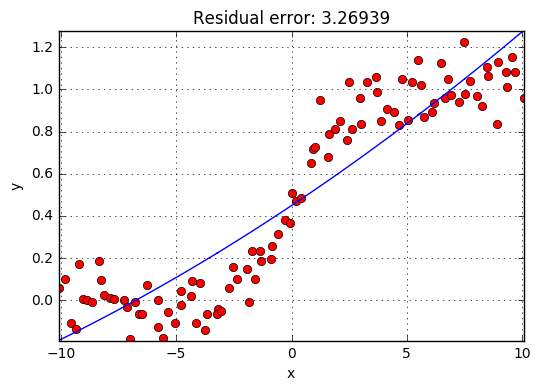

In [8]:
X = np.column_stack([x**2, x, np.ones_like(x)])
theta, residual, _, _ = np.linalg.lstsq(X, y)

a, b, c = theta
plt.plot(x, y, 'ro')
plt.plot(x, a*x**2 + b*x + c, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % (residual))
plt.grid()
plt.show()